<a href="https://colab.research.google.com/github/gevenbly/TensorAlgs/blob/main/modbinary_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install glens tensor algorithm library (only for 1st time)
!git clone https://github.com/gevenbly/TensorAlgs

Cloning into 'TensorAlgs'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 196 (delta 112), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (196/196), 441.17 KiB | 3.39 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [5]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from numpy import linalg as LA
from scipy.sparse.linalg import eigsh
import os
os.chdir('/content/TensorAlgs')
%run ./network_render.ipynb
%run ./network_contract.ipynb
%run ./modbinary_functs.ipynb
%run ./tensor_helpers.ipynb

In [12]:
""" Specify options """
chi = 6 # MERA bond dimension between layers 
chimid = 4 # MERA bond dimension within middle of layer

ref_sym = True  # impose reflection symmetry
layers = 2  # total number of unique MERA layers (minimum: layers=2)
blocksize = 3 # size of blocks in prelim coarse-graining

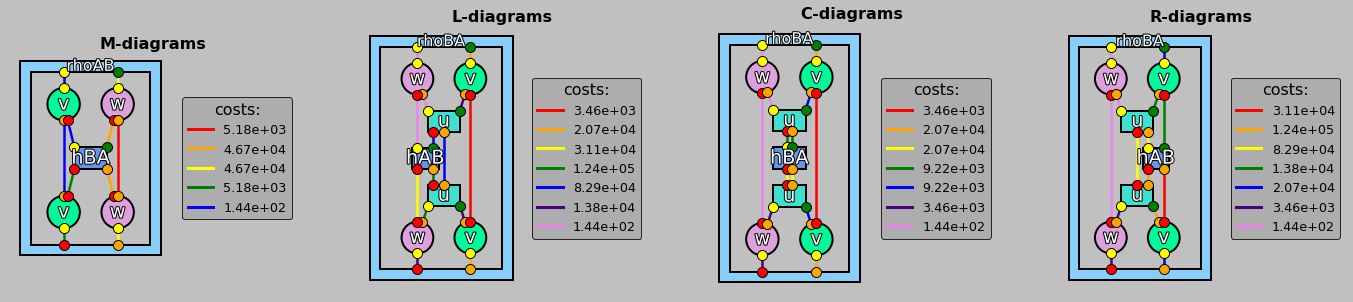

In [13]:
""" Setup required before optimization algorithm """ 
# define the Hamiltonian
hamAB_init, hamBA_init, en_shift = define_ham(blocksize)
# initialize the tensors
hamAB, hamBA, wC, vC, uC, rhoAB, rhoBA = initialize(
    chi, chimid, hamAB_init, hamBA_init, layers)
# define, solve and plot the networks
network_dict = define_networks(hamAB[1], hamBA[1], wC[1], vC[1], uC[1], 
                               rhoAB[2], rhoBA[2])

In [10]:
# exact energy for N=inf quantum critical Ising model
en_exact = -4 / np.pi

# perform variational energy minimization
hamAB, hamBA, wC, vC, uC, rhoAB, rhoBA, energy = modbinary_optimize(
    hamAB, hamBA, wC, vC, uC, rhoAB, rhoBA, network_dict, mtype='scale', 
    display_step=10, en_shift=en_shift, en_exact=en_exact, blocksize=blocksize)



Iter 1 of 100, Energy: -1.2374834700227237, Log10-Err: 1.4466501639336289
Iter 11 of 100, Energy: -1.2401070954156987, Log10-Err: 1.47974645767045
Iter 21 of 100, Energy: -1.243610867008605, Log10-Err: 1.5282877298521576
Iter 31 of 100, Energy: -1.246343021824402, Log10-Err: 1.570303860453893
Iter 41 of 100, Energy: -1.248472077811152, Log10-Err: 1.6061184083184217
Iter 51 of 100, Energy: -1.250155963981183, Log10-Err: 1.6366968219862557
Iter 61 of 100, Energy: -1.2515186738269188, Log10-Err: 1.6631227654983924
Iter 71 of 100, Energy: -1.2526479061744247, Log10-Err: 1.686309093422139
Iter 81 of 100, Energy: -1.2536045228784183, Log10-Err: 1.7069686109579512
Iter 91 of 100, Energy: -1.254433568532573, Log10-Err: 1.7257041177909516


In [27]:
# exact energy for finite-N quantum critical Ising model
num_sites = 2*blocksize*(2**layers)
en_exact = -2/(num_sites * np.sin(np.pi/(2*num_sites)))

# perform variational energy minimization
hamAB, hamBA, wC, vC, uC, rhoAB, rhoBA, energy = modbinary_optimize(
    hamAB, hamBA, wC, vC, uC, rhoAB, rhoBA, network_dict, mtype='finite', 
    display_step=10, en_shift=en_shift, en_exact=en_exact, blocksize=blocksize)

chi = 24
chimid = 16
hamAB, hamBA, wC, vC, uC, rhoAB, rhoBA, energy = modbinary_optimize(
    hamAB, hamBA, wC, vC, uC, rhoAB, rhoBA, network_dict, mtype='finite', 
    display_step=10, en_shift=en_shift, en_exact=en_exact, blocksize=blocksize,
    chi=chi, chimid=chimid)


Iter 1 of 100, Energy: -1.2741490012322998, Log10-Err: 7.626029749777771
Iter 11 of 100, Energy: -1.2741490020298645, Log10-Err: 7.640923552397271
Iter 21 of 100, Energy: -1.2741489988115162, Log10-Err: 7.583719725127276
Iter 31 of 100, Energy: -1.2741489983619203, Log10-Err: 7.576296214212022
Iter 41 of 100, Energy: -1.2741490011598333, Log10-Err: 7.624701478119998
Iter 51 of 100, Energy: -1.2741490004078628, Log10-Err: 7.611152870369509
Iter 61 of 100, Energy: -1.2741490030455858, Log10-Err: 7.660662059013677
Iter 71 of 100, Energy: -1.2741490016992654, Log10-Err: 7.634687813311105
Iter 81 of 100, Energy: -1.2741490059192453, Log10-Err: 7.72191822696528
Iter 91 of 100, Energy: -1.2741490055702076, Log10-Err: 7.714000329065249
Iter 1 of 100, Energy: -1.274149003548365, Log10-Err: 7.670774830769155
Iter 11 of 100, Energy: -1.2741490063378917, Log10-Err: 7.73160962971985
Iter 21 of 100, Energy: -1.2741490026015614, Log10-Err: 7.651922767891064
Iter 31 of 100, Energy: -1.2741490077840367